In [147]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder

# Load your dataset and split it into features (X) and target (y)
stroke_df = pd.read_csv("healthcare-dataset-stroke-data.csv")
stroke_df

stroke_df.drop(columns=['bmi'], inplace=True)

class MultiColumnLabelEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.encoders = {}
        for column in X.columns:
            le = LabelEncoder()
            le.fit(X[column].astype(str))
            self.encoders[column] = le
        return self
    
    def transform(self, X, y=None):
        X_copy = X.copy()
        for column, encoder in self.encoders.items():
            X_copy[column] = encoder.transform(X_copy[column].astype(str))
        return X_copy
    
encoder = MultiColumnLabelEncoder()
stroke_encoded = encoder.fit_transform(stroke_df)
stroke_encoded

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,5053,1,85,0,1,1,2,1,1618,1,1
1,3218,0,79,0,0,1,3,0,1356,2,1
2,1593,1,100,0,1,1,2,0,251,2,1
3,3907,0,65,0,0,1,2,1,1153,3,1
4,530,0,98,1,0,1,3,0,1162,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,652,0,100,1,0,1,2,1,3107,2,0
5106,2641,0,101,0,0,1,3,1,798,2,0
5107,745,0,50,0,0,1,3,0,3061,2,0
5108,2105,1,68,0,0,1,2,0,1131,1,0


In [148]:
# Isolate the 'Average Glucose Level' column
glucose_levels = stroke_encoded[['avg_glucose_level']]

# Fit to the data and then transform it
scaled_glucose_levels = scaler.fit_transform(glucose_levels)
stroke_encoded['avg_glucose_level'] = scaled_glucose_levels
stroke_encoded

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,5053,1,85,0,1,1,2,1,-0.406599,1,1
1,3218,0,79,0,0,1,3,0,-0.632663,2,1
2,1593,1,100,0,1,1,2,0,-1.586101,2,1
3,3907,0,65,0,0,1,2,1,-0.807819,3,1
4,530,0,98,1,0,1,3,0,-0.800054,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,652,0,100,1,0,1,2,1,0.878169,2,0
5106,2641,0,101,0,0,1,3,1,-1.114128,2,0
5107,745,0,50,0,0,1,3,0,0.838479,2,0
5108,2105,1,68,0,0,1,2,0,-0.826802,1,0


In [149]:
stroke_encoded = stroke_encoded.drop(index=3929)
stroke_encoded

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,5053,1,85,0,1,1,2,1,-0.406599,1,1
1,3218,0,79,0,0,1,3,0,-0.632663,2,1
2,1593,1,100,0,1,1,2,0,-1.586101,2,1
3,3907,0,65,0,0,1,2,1,-0.807819,3,1
4,530,0,98,1,0,1,3,0,-0.800054,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,652,0,100,1,0,1,2,1,0.878169,2,0
5106,2641,0,101,0,0,1,3,1,-1.114128,2,0
5107,745,0,50,0,0,1,3,0,0.838479,2,0
5108,2105,1,68,0,0,1,2,0,-0.826802,1,0


In [150]:
# Create the random forest classifier model
# with n_estimators=128 and random_state=1
rf_model = RandomForestClassifier(n_estimators=128, random_state=1)


# Feature selection
X = stroke_encoded[['gender', 'avg_glucose_level', 'smoking_status']]
y = stroke_encoded['stroke']

In [151]:
# This step we are splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# This following step is fitting the KNN model with the training data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=128, random_state=1)

In [152]:
# Make predictions on the test data
predictions = rf_model.predict_proba(X_test)[:, 1]  # Predict probability of stroke (class 1)

/Users/raphael/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [153]:
# Here we created a new DataFrame for the prediction
result_df = pd.DataFrame({'Gender': X_test['gender'], 'Average Glucose Level': X_test['avg_glucose_level'], 'Smoking Status': X_test['smoking_status'], 'Stroke_Probability': predictions})
result_df

,Gender,Average Glucose Level,Smoking Status,Stroke_Probability
4688,1,0.005838,0,0.000000
4478,1,0.022232,2,0.000000
3520,1,0.381174,0,0.000000
4355,0,0.515777,2,0.140625
3825,0,-1.236651,3,0.039062
...,...,...,...,...
3604,0,0.266416,3,0.000000
3509,0,0.287987,2,0.000000
4754,1,0.118008,2,0.062500
4105,0,-1.071848,3,0.000000


In [154]:
# Grouped the data by gender with a mean calculation for stroke probability for each gender. 
gender_grouped = result_df.groupby('Gender')['Stroke_Probability'].mean()

# Display the grouped data
print(gender_grouped)


Gender
0    0.049140
1    0.063397
2    0.000000
Name: Stroke_Probability, dtype: float64


In [155]:
gender_grouped.info()

<class 'pandas.core.series.Series'>
Index: 3 entries, 0 to 2
Series name: Stroke_Probability
Non-Null Count  Dtype  
--------------  -----  
3 non-null      float64
dtypes: float64(1)
memory usage: 48.0 bytes


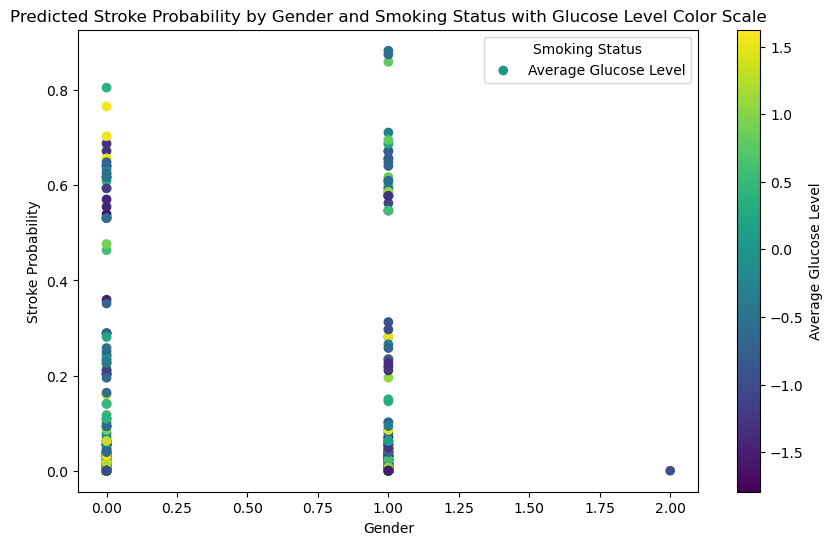

In [157]:
plt.figure(figsize=(10, 6))
plt.scatter(data=result_df, x='Gender', y='Stroke_Probability', c=result_df['Average Glucose Level'], cmap='viridis', label='Average Glucose Level')
plt.colorbar(label='Average Glucose Level')
plt.xlabel('Gender')
plt.ylabel('Stroke Probability')
plt.title('Predicted Stroke Probability by Gender and Smoking Status with Glucose Level Color Scale')
plt.legend(title='Smoking Status')
